In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
#ignore warnings
import warnings
warnings.filterwarnings("ignore") 

In [46]:
df=pd.read_csv('C:/Users/SRTINNI/Desktop/covid.csv',index_col='DATE'   ,parse_dates=True)
#df=pd.read_csv('C:/Users/SRTINNI/Desktop/covid.csv')
df=df.dropna()
print('Shape of data',df.shape)
df.head()
#df.describe()

Shape of data (660, 1)


,Daily new cases
DATE,
2020-08-03,3.0
2020-09-03,0.0
2020-10-03,0.0
2020-11-03,0.0
2020-12-03,0.0


<AxesSubplot:xlabel='DATE'>

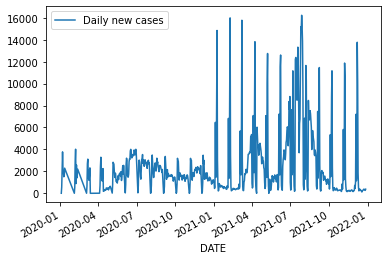

In [47]:
df.plot()
#df[:200].plot()

In [48]:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [49]:
adf_test(df['Daily new cases'])

Results of Dickey-Fuller Test:
Test Statistic                  -3.121773
p-value                          0.024983
#Lags Used                      20.000000
Number of Observations Used    639.000000
Critical Value (1%)             -3.440625
Critical Value (5%)             -2.866074
Critical Value (10%)            -2.569184
dtype: float64


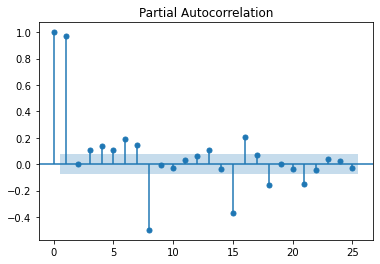

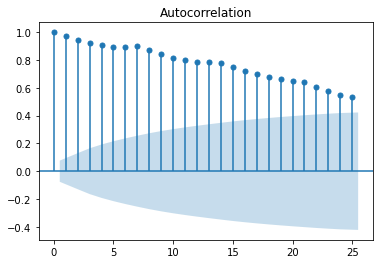

In [50]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
pacf=plot_pacf(df['Daily new cases'],lags=25)
acf=plot_acf(df['Daily new cases'],lags=25)

In [57]:
train=df[:len(df)-20]
test=df[len(df)-20:]

In [58]:
model=AutoReg(train,lags=25).fit()

In [59]:
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:        Daily new cases   No. Observations:                  640
Model:                    AutoReg(25)   Log Likelihood               -4733.653
Method:               Conditional MLE   S.D. of innovations            532.753
Date:                Fri, 14 Jan 2022   AIC                             12.644
Time:                        21:22:35   BIC                             12.838
Sample:                            25   HQIC                            12.719
                                  640                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
intercept              66.5401     30.274      2.198      0.028       7.203     125.877
Daily new cases.L1      0.9994      0.040     24.789      0.000       0.920       1.078
Daily new cases.

In [78]:
print(len(train))

640


In [79]:
start=len(train)
end=len(df)-1
pred=model.predict(start=len(train),end=len(df)-1,dynamic=False)

DATE
2021-08-12     313.953853
2021-09-12     375.204138
2021-10-12     441.841620
2021-11-12     347.627766
2021-12-12     514.615865
2021-12-13     579.940505
2021-12-14     673.641729
2021-12-15     656.703851
2021-12-16     729.983910
2021-12-17     764.144788
2021-12-18     696.666395
2021-12-19     932.280358
2021-12-20     917.963992
2021-12-21     981.788200
2021-12-22    1025.652297
2021-12-23    1089.650517
2021-12-24    1112.729174
2021-12-25    1080.014407
2021-12-26    1251.298789
2021-12-27    1302.578889
dtype: float64


<AxesSubplot:xlabel='DATE'>

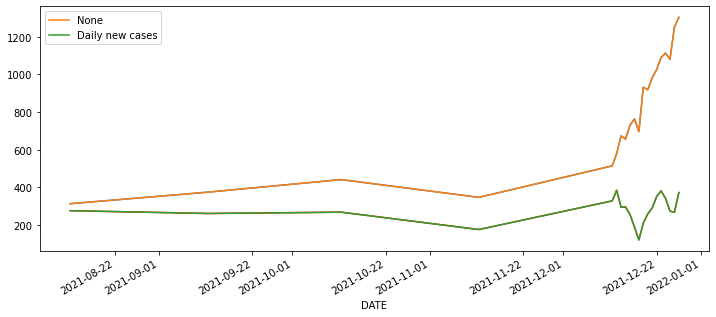

In [82]:
from matplotlib import pyplot
pyplot.plot(pred)
pyplot.plot(test,color='red')
pred.index=df.index[start:end+1]
print(pred)

pred.plot(legend=True)
test['Daily new cases'].plot(figsize=(12,5),legend=True)

In [81]:
from math import sqrt
from sklearn.metrics import mean_squared_error

rmse=sqrt(mean_squared_error(test,pred))
print(rmse)

581.327039630654


In [75]:
pred.mean()

789.4140522327227